In [12]:
import random
import pickle

import random

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms



from time import time
from time import sleep
from time import strftime
from time import localtime
from tqdm import tqdm

from datetime import date, timedelta, datetime

# from mydecorators import logger, stopwatch





## Classes for Different MMs

In [6]:
### Perfect or Near Perfect MM

class PerfectMM:
    def __init__(self, n_players, wr=0.5, req_net_games = 40):
        ### win rate that the algorithm aims for
        self.wr = wr
        ### lose rate (?)
        self.lr = 1 - self.wr
        ### number of players involved
        self.n_players = n_players
        ### required number of net games won
        self.req_net_games = req_net_games
        
    def compute(self, save=False):
        ### compute start time
        self.start = time()
        ### number of games per player
        self.start = time()
        self.n_games_list = []
        ### win rates of all players
        self.player_wr_list = []
        
        ### record of all games by the population (eg. 1000 players)
        self.record_all = []
        
        ### save or not save the record of games
        self.save = save
        
        ### win or lose ?
        outcome_list = [1, 0]   ### 1 for WIN, 0 for DEFEAT
        
        for _ in tqdm(range(self.n_players)):
            # all games for ONE player
            all_games = []
            ### number of games played so far for each player
            n_games = 0
            ### number of net games won
            n_wins = 0
            
            while n_wins < self.req_net_games:
                ### play one game & add to n_games
                n_games += 1
                ### result of played game
                one_game = random.choices(outcome_list, weights=(self.wr, self.lr))[0]
                all_games.append(one_game)
                
                if one_game == 1:
                    n_wins += 1
                else:
                    n_wins -= 1
                    

            player_wr = sum(all_games)/len(all_games)
            self.player_wr_list.append(player_wr)
            self.n_games_list.append(n_games)
            
            ### append all games played by one player to record of all games played by population in question
            self.record_all.append(all_games)
            
           
        ### number of average games played per player
        self.n_avg_games = sum(self.n_games_list) / self.n_players
        ### average win rate
        self.avg_wr = sum(self.player_wr_list) / self.n_players
        ### compute end time
        self.end = time()
        ### compute duration
        self.compute_time = self.end - self.start
        
        
        ### save or not save record of all games by all players 
        if self.save is False:
            self.filename = f'No saved files created'
            pass
        else:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            self.filename = f'saved_lists/perfectmm_{timestamp}.txt'
            with open(self.filename, 'wb') as file:
                pickle.dump(self.record_all, file)
                
                
            
        
    def report(self):
        print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
        print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
        print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
        print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
        print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
        print(f'Saved Result(filename): {self.filename} \n')

In [7]:
# ### Streak MM

# class StreakMM:
#     def __init__(self, n_players, req_net_games = 40):
#         ### number of players involved
#         self.n_players = n_players
#         ### required number of net games won
#         self.req_net_games = req_net_games
        
        
        
        
#     def compute(self, wsr=0.5, wlr=0.85, n_streak=6, bottom=True, n_bottom=0, save=False):
#         ### compute start time
#         self.start = time()
        
#         ### number of games per player
#         self.n_games_list = []
        
#         ### win rates of all players
#         self.player_wr_list = []
        
#         ### record of all games by the population (eg. 1000 players)
#         self.record_all = []
        
#         ### save or not save the record of games
#         self.save = save
        
#         ### streak probabilities
#         self.wsr = wsr
#         self.lsr = 1 - self.wsr
        
#         ### number of games per streak
#         self.n_streak = n_streak
        
#         ### win or lose rate per streak
#         self.wlr = wlr
        
#         ### bottom net games won
#         self.bottom = bottom
        
#         ### threshold for bottom net games won
#         self.n_bottom = n_bottom
        
#         ### Two types of streaks
#         streak_list = ['WS', 'LS']
#         ### win or lose ?
#         outcome_list = [1, 0]
        
#         for _ in tqdm(range(self.n_players)):
#             # all games for ONE player
#             all_games = []
#             ### number of games played so far for each player
#             n_games = 0
#             ### number of net games won
#             n_wins = 0
                    
#             while n_wins < self.req_net_games:
#                 ### random select one streak
#                 one_streak = random.choices(streak_list, weights=(self.wsr, self.lsr))[0]
#                 ### add number of games of streak to number of games played
#                 n_games += self.n_streak
                
#                 ### if WS (win streak)
#                 if one_streak == "WS":
#                     wr = self.wlr
#                     lr = 1-self.wlr
                
#                     ### randomly pick streak results given which streak
#                     streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
#                     all_games.extend(streak_result)
                    
#                     for wl in streak_result:
#                         if wl == 1:
#                             n_wins += 1
#                         else:
#                             n_wins -= 1
                
#                 ### if LS (Losing Streak)
#                 else:
#                     wr = 1-self.wlr
#                     lr = self.wlr
                    
#                     ### randomly pick streak results given which streak
#                     streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
#                     all_games.extend(streak_result)
                    
#                     for wl in streak_result:
#                         if wl == 1:
#                             n_wins += 1
#                         else:
#                             if self.bottom == False:
#                                 n_wins -= 1
#                             else:
#                                 if n_wins < 0:
#                                     n_wins = abs(self.n_bottom) * (-1)
            
#             ### calculate and organize result
#             # victory = 0
#             # defeat = 0
            
#             # for game in all_games:
#             #     if game == "W":
#             #         victory += 1
#             #     else:
#             #         defeat += 1
                
#             self.n_games_list.append(n_games)
#             player_wr = sum(all_games)/len(all_games)
#             self.player_wr_list.append(player_wr)
            
#             ### append all games played by one player to record of all games played by population in question
#             self.record_all.append(all_games)
                
                
#         ### number of average games played per player
#         self.n_avg_games = sum(self.n_games_list) / self.n_players
#         ### average win rate
#         self.avg_wr = sum(self.player_wr_list) / self.n_players
        
#         ### compute end time
#         self.end = time()
#         ### compute duration
#         self.compute_time = self.end - self.start
        
#         ### save or not save record of all games by all players 
#         if self.save is False:
#             self.filename = f'No saved files created'
#             pass
#         else:
#             timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
#             self.filename = f'saved_lists/streakmm_{timestamp}.txt'
#             with open(self.filename, 'wb') as file:
#                 pickle.dump(self.record_all, file)
            
        
#     def report(self):
#         print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
#         print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
#         print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
#         print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
#         print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
#         print(f'Saved Result(filename): {self.filename} \n')
        
        
    
        
        

In [8]:
### Streak MM

class StreakMM:
    def __init__(self, n_players, req_net_games = 40):
        ### number of players involved
        self.n_players = n_players
        ### required number of net games won
        self.req_net_games = req_net_games
        
        
        
        
    def compute(self, wsr=0.5, wlr=0.85, n_streak=6, bottom=True, n_bottom=0, save=False):
        ### compute start time
        self.start = time()
        
        ### number of games per player
        self.n_games_list = []
        
        ### win rates of all players
        self.player_wr_list = []
        
        ### record of all games by the population (eg. 1000 players)
        self.record_all = []
        
        ### save or not save the record of games
        self.save = save
        
        ### streak probabilities
        self.wsr = wsr
        self.lsr = 1 - self.wsr
        
        ### number of games per streak
        self.n_streak = n_streak
        
        ### win or lose rate per streak
        self.wlr = wlr
        
        ### bottom net games won
        self.bottom = bottom
        
        ### threshold for bottom net games won
        self.n_bottom = n_bottom
        
        ### Two types of streaks
        streak_list = ['WS', 'LS']
        ### win or lose ?
        outcome_list = [1, 0]
        
        for _ in tqdm(range(self.n_players)):
            # all games for ONE player
            all_games = []
            ### number of games played so far for each player
            n_games = 0
            ### number of net games won
            n_wins = 0
                    
            while n_wins < self.req_net_games:
                ### random select one streak
                one_streak = random.choices(streak_list, weights=(self.wsr, self.lsr))[0]
                ### add number of games of streak to number of games played
                n_games += self.n_streak
                
                ### if WS (win streak)
                if one_streak == "WS":
                    wr = self.wlr
                    lr = 1-self.wlr
                
                    ### randomly pick streak results given which streak
                    streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
                    all_games.extend(streak_result)
                    
                    for wl in streak_result:
                        if wl == 1:
                            n_wins += 1
                        else:
                            n_wins -= 1
                
                ### if LS (Losing Streak)
                else:
                    wr = 1-self.wlr
                    lr = self.wlr
                    
                    ### randomly pick streak results given which streak
                    streak_result = random.choices(outcome_list, weights=(wr, lr), k = n_streak)
                    all_games.extend(streak_result)
                    
                    for wl in streak_result:
                        if wl == 1:
                            n_wins += 1
                        else:
                            n_wins -= 1
                            if self.bottom == True:
                                if n_wins < abs(self.n_bottom) * (-1):
                                    n_wins = abs(self.n_bottom) * (-1)
                                else:
                                    pass
                            else:
                                pass
                            
                            
#                             if self.bottom == False:
#                                 n_wins -= 1
#                             else:
#                                 n_wins
#                                 if n_wins < 0:
#                                     n_wins = abs(self.n_bottom) * (-1)
            
            ### calculate and organize result
            # victory = 0
            # defeat = 0
            
            # for game in all_games:
            #     if game == "W":
            #         victory += 1
            #     else:
            #         defeat += 1
                
            self.n_games_list.append(n_games)
            player_wr = sum(all_games)/len(all_games)
            self.player_wr_list.append(player_wr)
            
            ### append all games played by one player to record of all games played by population in question
            self.record_all.append(all_games)
                
                
        ### number of average games played per player
        self.n_avg_games = sum(self.n_games_list) / self.n_players
        ### average win rate
        self.avg_wr = sum(self.player_wr_list) / self.n_players
        
        ### compute end time
        self.end = time()
        ### compute duration
        self.compute_time = self.end - self.start
        
        ### save or not save record of all games by all players 
        if self.save is False:
            self.filename = f'No saved files created'
            pass
        else:
            timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
            self.filename = f'saved_lists/streakmm_{timestamp}.txt'
            with open(self.filename, 'wb') as file:
                pickle.dump(self.record_all, file)
            
        
    def report(self):
        print(f'List of No. of Games Played(n_games_list): {self.n_games_list} \n')
        print(f'Number of Average Games Played(n_avg_games): {self.n_avg_games} \n')
        print(f'Win Rates of Players(player_wr_list): {self.player_wr_list} \n')
        print(f'Average Win Rate(avg_wr): {self.avg_wr} \n')
        print(f'Compute Time(compute_time): {self.compute_time} seconds \n')
        print(f'Saved Result(filename): {self.filename} \n')
        
        
    
        
        

## Experiments

In [9]:
### number of net games required
net_games_required = 40

### PerfectMM 

In [13]:
paul_perfectmm = PerfectMM(1)
print(paul_perfectmm)
print(paul_perfectmm.wr)
print(paul_perfectmm.n_players)
paul_perfectmm.compute()
# paul_perfectmm.compute(save=True)

0.5
1


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 199.80it/s]


In [ ]:
paul_perfectmm.report()

In [ ]:
five_perfectmm = PerfectMM(5)
print(five_perfectmm)
print(five_perfectmm.wr)
print(five_perfectmm.n_players)
five_perfectmm.compute()
# paul_perfectmm.compute(save=True)

In [ ]:
five_perfectmm.report()

In [ ]:
### 100 players SIM 1
### set random seed
random.seed(15)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

In [ ]:
hund_player_perfectmm.n_avg_games

In [ ]:
### 100 players SIM 2
### set random seed
random.seed(887)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

In [ ]:
hund_player_perfectmm.n_avg_games

In [ ]:
### 100 players SIM 3
### set random seed
random.seed(111)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

In [ ]:
hund_player_perfectmm.n_avg_games

In [ ]:
### 100 players SIM 4
### set random seed
random.seed(444)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

In [ ]:
hund_player_perfectmm.n_avg_games

In [ ]:
### 100 players SIM 5
### set random seed
random.seed(5687)

hund_player_perfectmm = PerfectMM(100, wr = 0.50)
print(hund_player_perfectmm)
# print(hund_player_perfectmm.wr)
# print(hund_player_perfectmm.n_players)
hund_player_perfectmm.compute()
# hund_player_perfectmm.compute(save=True)
# print(hund_player_perfectmm.n_games_list)
# hund_player_perfectmm.report()

In [ ]:
hund_player_perfectmm.n_avg_games

### NearPerfectMM 

In [ ]:
paul_nearperfectmm = PerfectMM(5, wr = 0.501)
print(paul_nearperfectmm)
print(paul_nearperfectmm.wr)
print(paul_nearperfectmm.n_players)
paul_nearperfectmm.compute()
# paul_perfectmm.compute(save=True)

In [ ]:
paul_nearperfectmm.report()

In [ ]:
# len(paul_nearperfectmm.record_all[0])
len(paul_nearperfectmm.record_all[0])

In [ ]:
len_records = []
for item in paul_nearperfectmm.record_all:
    len_records.append(len(item))
    


In [ ]:
plt.hist(record_lengths, color='lightgreen', ec='black', bins=15)
plt.show()

In [ ]:
plt.hist(record_lengths, color='lightgreen', ec='black', bins=15)
plt.scatter(100,10, color='red')
plt.show()

In [ ]:
### 1000 players SIM 1
### set random seed
random.seed(15)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

In [ ]:
### 1000 players SIM 2
### set random seed
random.seed(25)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

In [ ]:
### 1000 players SIM 3
### set random seed
random.seed(76)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

In [ ]:
### 1000 players SIM 4
### set random seed
random.seed(109)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

In [ ]:
### 1000 players SIM 5
### set random seed
random.seed(765)

thous_player_perfectmm = PerfectMM(1000, wr = 0.501)
print(thous_player_perfectmm)
thous_player_perfectmm.compute()
thous_player_perfectmm.n_avg_games

#### NearPerfectMM with range of Win Rates 

In [ ]:
# wr_list = [0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
wr_list = np.arange(0.501, 0.601, 0.001)

In [ ]:
random.seed(200)

n_avg_games_list = []
len_per_wr = []
for wr in wr_list:
    print(f'wr : {wr}')
    record_lengths = []
    thous_player_perfectmm = PerfectMM(1000, wr = wr)
    print(thous_player_perfectmm)
    thous_player_perfectmm.compute()
    thous_player_perfectmm.n_avg_games
    n_avg_games_list.append(thous_player_perfectmm.n_avg_games)
    
    for item in thous_player_perfectmm.record_all:
        record_lengths.append(len(item))
        
    len_per_wr.append(record_lengths)

In [ ]:
# len(len_per_wr)
len(len_per_wr[1])

In [ ]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].hist(len_per_wr[ind], color='green', ec='black', bins=80)
        axs[i, j].axvline(np.mean(len_per_wr[i*ccols + j]), color='r')
        # axs[i, j].axvline(max(set(len_per_wr[i*ccols + j]), key=len_per_wr[i*ccols + j].count), color='gold')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

In [ ]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].boxplot(len_per_wr[ind])
        # axs[i, j].axvline(np.mean(len_per_wr[i*ccols + j]), color='r')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

In [ ]:
new_len_per_wr = len_per_wr.copy()
for rec_lens in new_len_per_wr:
    for item in rec_lens:
        # if item >= 9000:
        if item >= 3000:
            rec_lens.remove(item)



In [ ]:
# for item in new_len_per_wr:
#     print(len(item))

In [ ]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].hist(new_len_per_wr[ind], color='lightgreen', ec='black', bins=100)
        axs[i, j].axvline(np.mean(new_len_per_wr[i*ccols + j]), color='r')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

In [ ]:
### rrows * ccols = len(wr_list)
rrows = 25
ccols = int(len(wr_list)/rrows)
fig, axs = plt.subplots(rrows, ccols, figsize=(20,80), constrained_layout = True)
# fig.tight_layout(pad=1)

for i in range(rrows):
    for j in range(ccols):
        ind = i*ccols + j
        axs[i, j].set_title(f'Win Rate : {wr_list[ind]}')
        axs[i, j].boxplot(new_len_per_wr[ind])
        # axs[i, j].axvline(np.mean(len_per_wr[i*ccols + j]), color='r')
        
        # axs[i, j].set_xaxis()
    




# for i in range(rrows):
#     for j in range(ccols):
#         # print(i, j)
    

In [ ]:
len(n_avg_games_list)

In [ ]:
# n_avg_games_list

In [ ]:
# plt.plot(wr_list, n_avg_games_list, linestyle='--')
# plt.title('Avg Number of Games Played per Win Rate')
# plt.xlabel('Win Rate')
# plt.ylabel('Avg Number of Games Played')

# ### draw horizontal lines
# plt.axhline(18000, color='r')
# plt.axhline(9000, color='r')
# plt.axhline(6000, color='r')



# plt.show()

In [ ]:
# https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Avg Number of Games Played per Win Rate')
ax.set_xlabel('Win Rate')
ax.set_ylabel('Avg Number of Games Played')

ax.plot(wr_list, n_avg_games_list, linestyle='--')
# ax.axhline(18000, color="red")
# ax.axhline(9000, color="orange")
# ax.axhline(6000, color="green")

# ax.axvline(wr_list[0], color='red')
# ax.axvline(wr_list[1], color='orange')
# ax.axvline(wr_list[2], color='green')

ax.plot(wr_list[0], int(n_avg_games_list[0]), color='red', marker='o')
ax.plot(wr_list[1], int(n_avg_games_list[1]), color='orange', marker='o')
ax.plot(wr_list[2], int(n_avg_games_list[2]), color='green', marker='o')
ax.plot(wr_list[9], int(n_avg_games_list[9]), color='blue', marker='o')
ax.plot(wr_list[-1], int(n_avg_games_list[-1]), color='black', marker='o')
# ax.plot(wr_list[1], color='orange')
# ax.plot(wr_list[2], color='green')

# Here: add a new tick with the required value
# xticks = [*ax.get_xticks(), wr_list[0], wr_list[1], wr_list[2]]
# xticklabels = [*ax.get_xticklabels(),wr_list[0], wr_list[1], wr_list[2]]

# yticks = [*ax.get_yticks(), 9000]
# yticklabels = [*ax.get_yticklabels(), int(9000)]
# ax.set_yticks(yticks, labels=yticklabels)

trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)

# ax.text(0, 9000, '9000', color='red')
ax.text(0.25, int(n_avg_games_list[0]), f"{wr_list[0]*100}%, {int(n_avg_games_list[0])} games", color="red", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[1]), f"{wr_list[1]*100}%, {int(n_avg_games_list[1])} games", color="orange", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[2]), f"{wr_list[2]*100}%, {int(n_avg_games_list[2])} games", color="green", transform=trans, ha="right", va="center")
ax.text(0.3, int(n_avg_games_list[9]), f"{wr_list[9]*100}%, {int(n_avg_games_list[9])} games", color="blue", transform=trans, ha="right", va="center")
ax.text(1, 600, f"{wr_list[-1]*100}%, {int(n_avg_games_list[-1])} games", color="black", transform=trans, ha="right", va="center")




plt.show()


In [ ]:
wr_list

### StreakMM 

#### StreakMM with NO BOTTOM 

In [ ]:
random.seed(96743)
five_player_streakmm = StreakMM(5)
# five_player_streakmm.compute(bottom=False, save=True)
# five_player_streakmm.compute(bottom=False)

In [ ]:
# five_player_streakmm.compute(bottom=False, save=True)
five_player_streakmm.compute(bottom=False)
five_player_streakmm.n_games_list

In [ ]:
# dir(five_player_streakmm)
five_player_streakmm.n_avg_games

In [ ]:
five_player_streakmm.player_wr_list

In [ ]:
### StreakMM // 1000 players SIM 1
### set random seed
random.seed(10)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

In [ ]:
### StreakMM // 1000 players SIM 2
### set random seed
random.seed(143)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

In [ ]:
### StreakMM // 1000 players SIM 3
### set random seed
random.seed(91)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

In [ ]:
### StreakMM // 1000 players SIM 4
### set random seed
random.seed(735)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

In [ ]:
### StreakMM // 1000 players SIM 5
### set random seed
random.seed(68)

thousand_player_streakmm = StreakMM(1000)
thousand_player_streakmm.compute(bottom=False)
# thousand_player_streakmm.compute(bottom=False, save=True)
print(thousand_player_streakmm.n_avg_games)
print(thousand_player_streakmm.avg_wr)

In [ ]:
(0.5420898508755609 + 0.5396237907017246 + 0.5425250746471222 + 0.5389040097753112 + 0.5389040097753112) / 5

In [ ]:
(403344.84+1045363.464+572045.592+334391.658+139853.022)

In [ ]:
(403344.84+1045363.464+572045.592+334391.658+139853.022) /5 

#### StreakMM with Bottom (= 0) 

In [ ]:
n_bottom = 0

In [ ]:
random.seed(1000)
five_player_streakmm = StreakMM(5)
# five_player_streakmm.compute(bottom=False, save=True)
# five_player_streakmm.compute(bottom=False)

In [ ]:
five_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
five_player_streakmm.n_games_list


In [ ]:
# dir(five_player_streakmm)
five_player_streakmm.n_avg_games

In [ ]:
five_player_streakmm.player_wr_list

In [ ]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 0

seeds = [987,909,275,8124,284]

for sd in seeds:
    random.seed(sd)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

In [ ]:
(540.108 +
547.98+
529.968+
550.908+
548.07)/5



#### StreakMM with Bottom (= 10)

In [ ]:
n_bottom = 10

In [ ]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 10

seeds = [123,5346,245,762,7231]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

In [ ]:
(756.996+
740.274+
766.896+
787.506+
765.786

)/5


#### StreakMM with Bottom (= 20)

In [ ]:
n_bottom = 20

In [ ]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 20

seeds = [8234,3346,2415,72,23]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

In [ ]:
(1044.24+
1020.42+
969.366+
1022.904+
984.984)/5



#### StreakMM with Bottom (= 30)

In [ ]:
n_bottom = 30

In [ ]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 30

seeds = [43,17,532,875,461]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

In [ ]:
(1334.988+
1271.478+
1250.658+
1308.726+
1254.288)/5



#### StreakMM with Bottom (= 40)

In [ ]:
n_bottom = 40

In [ ]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 40

seeds = [7,1,80,45,13133]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

In [ ]:
(1511.898+
1530.984+
1473.486+
1466.496+
1458.0)/5



#### StreakMM with Bottom (= 50)

In [ ]:
n_bottom = 50

In [ ]:
### StreakMM // 1000 players SIM 1 ~ 5
### bottom = 50

seeds = [6,77,888,474,23232]

for seed in seeds:
    random.seed(seed)

    thousand_player_streakmm = StreakMM(1000)
    thousand_player_streakmm.compute(bottom=True, n_bottom=n_bottom)
    # thousand_player_streakmm.compute(bottom=False, save=True)
    
    print(f'n_avg_games : {thousand_player_streakmm.n_avg_games}')
    print(f'avg_wr : {thousand_player_streakmm.avg_wr}')
    print(f'max(n_games_list) : {max(thousand_player_streakmm.n_games_list)}')
    print(f'min(n_games_list) : {min(thousand_player_streakmm.n_games_list)}')

## MISC

In [14]:
n_avg_games_list = [16275.122,
 9889.8,
 6552.968,
 5005.22,
 4268.476,
 3252.382,
 2803.194,
 2443.734,
 2416.79,
 1988.562,
 1776.416,
 1716.216,
 1530.176,
 1440.958,
 1340.19,
 1296.862,
 1163.65,
 1121.12,
 992.732,
 1020.566,
 994.69,
 885.342,
 870.482,
 856.222,
 810.366,
 786.666,
 749.278,
 710.36,
 690.256,
 663.062,
 674.01,
 627.042,
 580.902,
 587.12,
 572.986,
 549.814,
 555.494,
 520.152,
 510.27,
 499.35,
 497.752,
 482.2,
 461.516,
 451.58,
 436.416,
 437.918,
 423.546,
 398.802,
 404.0,
 406.556,
 388.666,
 383.962,
 376.966,
 368.722,
 364.662,
 361.484,
 346.112,
 349.268,
 338.376,
 326.114,
 324.984,
 318.796,
 318.658,
 314.434,
 307.372,
 303.066,
 304.23,
 280.424,
 288.494,
 281.348,
 271.956,
 279.102,
 267.212,
 269.522,
 270.22,
 261.012,
 259.01,
 253.024,
 255.112,
 246.726,
 246.3,
 244.068,
 241.676,
 237.09,
 228.604,
 233.626,
 230.63,
 228.0,
 225.658,
 225.146,
 221.016,
 219.752,
 216.122,
 212.562,
 211.18,
 211.308,
 204.916,
 206.118,
 200.87]

In [15]:
# wr_list = [0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6]
wr_list = np.arange(0.501, 0.6, 0.001)

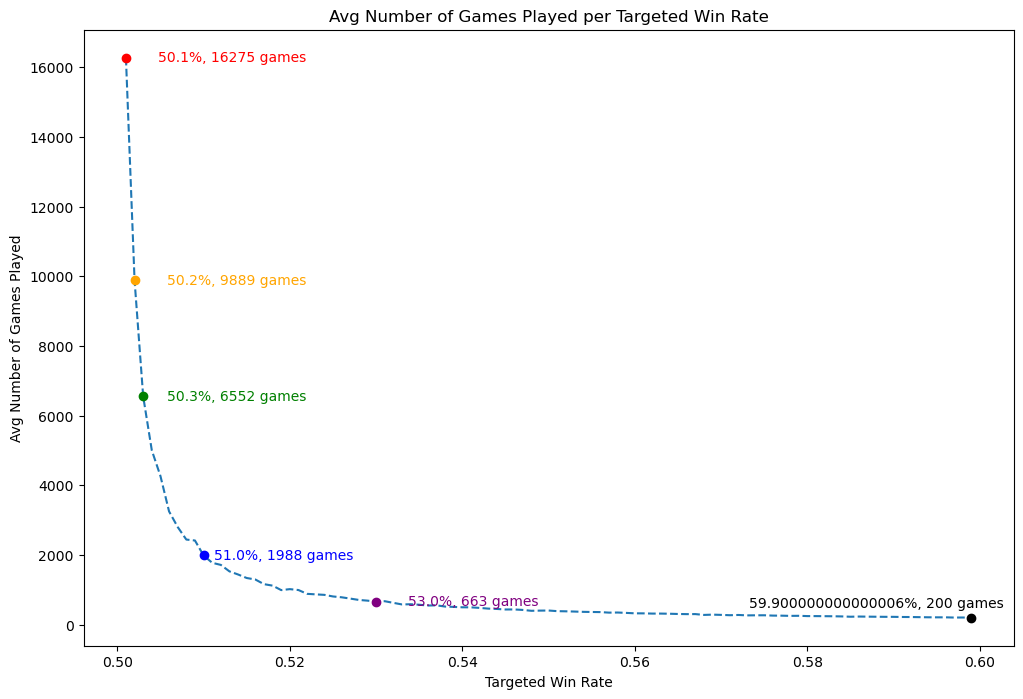

In [27]:
# https://stackoverflow.com/questions/42877747/add-a-label-to-y-axis-to-show-the-value-of-y-for-a-horizontal-line-in-matplotlib

fig, ax = plt.subplots(figsize=(12,8))

ax.set_title('Avg Number of Games Played per Targeted Win Rate')
ax.set_xlabel('Targeted Win Rate')
ax.set_ylabel('Avg Number of Games Played')

ax.plot(wr_list, n_avg_games_list, linestyle='--')
# ax.axhline(18000, color="red")
# ax.axhline(9000, color="orange")
# ax.axhline(6000, color="green")

# ax.axvline(wr_list[0], color='red')
# ax.axvline(wr_list[1], color='orange')
# ax.axvline(wr_list[2], color='green')

ax.plot(wr_list[0], int(n_avg_games_list[0]), color='red', marker='o')
ax.plot(wr_list[1], int(n_avg_games_list[1]), color='orange', marker='o')
ax.plot(wr_list[2], int(n_avg_games_list[2]), color='green', marker='o')
ax.plot(wr_list[9], int(n_avg_games_list[9]), color='blue', marker='o')
ax.plot(wr_list[29], int(n_avg_games_list[29]), color='purple', marker='o')
ax.plot(wr_list[-1], int(n_avg_games_list[-1]), color='black', marker='o')
# ax.plot(wr_list[1], color='orange')
# ax.plot(wr_list[2], color='green')

# Here: add a new tick with the required value
# xticks = [*ax.get_xticks(), wr_list[0], wr_list[1], wr_list[2]]
# xticklabels = [*ax.get_xticklabels(),wr_list[0], wr_list[1], wr_list[2]]

# yticks = [*ax.get_yticks(), 9000]
# yticklabels = [*ax.get_yticklabels(), int(9000)]
# ax.set_yticks(yticks, labels=yticklabels)

trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)

# ax.text(0, 9000, '9000', color='red')
ax.text(0.25, int(n_avg_games_list[0]), f"{wr_list[0]*100}%, {int(n_avg_games_list[0])} games", color="red", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[1]), f"{wr_list[1]*100}%, {int(n_avg_games_list[1])} games", color="orange", transform=trans, ha="right", va="center")
ax.text(0.25, int(n_avg_games_list[2]), f"{wr_list[2]*100}%, {int(n_avg_games_list[2])} games", color="green", transform=trans, ha="right", va="center")
ax.text(0.3, int(n_avg_games_list[9]), f"{wr_list[9]*100}%, {int(n_avg_games_list[9])} games", color="blue", transform=trans, ha="right", va="center")
ax.text(0.5, int(n_avg_games_list[29]), f"{wr_list[29]*100}%, {int(n_avg_games_list[29])} games", color="purple", transform=trans, ha="right", va="center")
ax.text(1, 600, f"{wr_list[-1]*100}%, {int(n_avg_games_list[-1])} games", color="black", transform=trans, ha="right", va="center")




plt.show()


In [5]:
for i in range(len(wr_list)):
    print(wr_list[i], n_avg_games_list[i])

0.501 16275.122
0.502 9889.8
0.503 6552.968
0.504 5005.22
0.505 4268.476
0.506 3252.382
0.507 2803.194
0.508 2443.734
0.509 2416.79
0.51 1988.562
0.511 1776.416
0.512 1716.216
0.513 1530.176
0.514 1440.958
0.515 1340.19
0.516 1296.862
0.517 1163.65
0.518 1121.12
0.519 992.732
0.52 1020.566
0.521 994.69
0.522 885.342
0.523 870.482
0.524 856.222
0.525 810.366
0.526 786.666
0.527 749.278
0.528 710.36
0.529 690.256
0.53 663.062
0.531 674.01
0.532 627.042
0.533 580.902
0.534 587.12
0.535 572.986
0.536 549.814
0.537 555.494
0.538 520.152
0.539 510.27
0.54 499.35
0.541 497.752
0.542 482.2
0.543 461.516
0.544 451.58
0.545 436.416
0.546 437.918
0.547 423.546
0.548 398.802
0.549 404.0
0.55 406.556
0.551 388.666
0.552 383.962
0.553 376.966
0.554 368.722
0.555 364.662
0.556 361.484
0.557 346.112
0.558 349.268
0.559 338.376
0.56 326.114
0.561 324.984
0.562 318.796
0.5630000000000001 318.658
0.5640000000000001 314.434
0.5650000000000001 307.372
0.5660000000000001 303.066
0.5670000000000001 304.23
0.